## This work continues from 2024-11-19_Sig_Overlay.jpynb

# Overlaying sinatures:

In [1]:
#load packages I need
import os
import scanpy as sc
import pandas as pd
import seaborn as sns
import dandelion as ddl
import matplotlib.pyplot as plt

In [2]:
#show current directory 
os.getcwd()
os.chdir('/scratch/user/s4436039/scdata/Python_Integration_Sep')
os.getcwd()

'/scratch/user/s4436039/scdata/Python_Integration_Sep'

In [3]:
sc.logging.print_header()

scanpy==1.10.2 anndata==0.10.8 umap==0.5.6 numpy==1.26.4 scipy==1.14.0 pandas==2.2.2 scikit-learn==1.5.0 statsmodels==0.14.2 igraph==0.11.5 pynndescent==0.5.12


In [4]:
ddl.logging.print_header()

dandelion==0.3.8 pandas==2.2.2 numpy==1.26.4 matplotlib==3.9.2 networkx==3.3 scipy==1.14.0


In [5]:
# read in data
data = sc.read_h5ad('NRclean_clustered2.h5ad')
data_DC = sc.read_h5ad('NRclean_clustered2_DC.h5ad')

In [6]:
data

AnnData object with n_obs × n_vars = 498023 × 1268
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'keep_or_remove', 'leiden', 'celltype', 'leiden_DC', 'leiden_DC_v2', 'exclude_annots', 'leiden_M', 'Technology', 'cancer_type_broad', 'clean-leiden_0.8', 'clean-subcluster', 'clean-subcluster-v2', 'YS_sig', 'HSC_sig', 'CD5nDC2_up_vDC3', 'DC3_up_vCD5nDC2', 'CD5pDC2_up_vDC3', 'DC3_up_vCD5pDC2', 'DC3_up_vMono', 'Mono_up_vDC3', 'DC1_sig', 'DC2_sig', 'DC3_sig', 'DC_Axl_sig', 'DC2_up_DC3', 'DC3_up_DC2', 'mregDC_sig', 'cDC1_mregDC', 'cDC2_mregDC', 'NR_annotati

In [7]:
data_DC

AnnData object with n_obs × n_vars = 30241 × 1268
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'keep_or_remove', 'leiden', 'celltype', 'leiden_DC', 'leiden_DC_v2', 'exclude_annots', 'leiden_M', 'Technology', 'cancer_type_broad', 'clean-leiden_0.8', 'clean-subcluster', 'clean-subcluster-v2', 'YS_sig', 'HSC_sig', 'CD5nDC2_up_vDC3', 'DC3_up_vCD5nDC2', 'CD5pDC2_up_vDC3', 'DC3_up_vCD5pDC2', 'DC3_up_vMono', 'Mono_up_vDC3', 'DC1_sig', 'DC2_sig', 'DC3_sig', 'DC_Axl_sig', 'DC2_up_DC3', 'DC3_up_DC2', 'mregDC_sig', 'cDC1_mregDC', 'cDC2_mregDC', 'NR_annotatio

### Overlay my tumour uptake sig: 

In [8]:
#make an object with my sig - see excel file Nikita-mregDC_DEG_summary on i drive
Uptake_sig = ["CCL22","IL4I1","SIRPA","CCR7","CHST11","GPR157","RGS1","BIRC3","TRAF1","CSF2RA","TBC1D13","LAMP3","MREG","PPP1R14A","SPRED2","CD83","TXN","MOB3A","NFKB1","TBC1D4","CDK2","WFDC21P","ARAP2","ZER1","ACSL1","SPINT2","SQSTM1","TBC1D8","JAG1","AC073508.3","BATF","ETV3","BCL2","KIF2A","FSCN1","TNFAIP3","CCDC28B","NR4A3","CYTIP","PLEK","FOXO1","TOMM34","TRAFD1","PPP1R16B","CXCR4","CD40","ENTPD7","CDKN1A","BID","MARCKS","DUSP5","MAP4K4","BCL2L1","ISG20","RNF145","RNF121","GPR132","RASGEF1B","CYRIA","RAB10","CERS6","IL1R1","STK4","CLEC2D","AL390719.1","ZBTB38","IFNGR2","CD274","SLC41A2","NRP2","ANKRD33B","GPR183","POGLUT1","ADORA2A","JADE3","KHDRBS3","CTNNB1","SLCO5A1","NFKB2","RGS2","SEC61B","ZNRF1","RELB","C12orf45","IRF2","EPOP","MXD1","RAB5B","PADI2","DRAM1","MTMR4","EEF2K","GCNT2","RAPH1","BCL2A1","SEC23B","PIM3","ANTXR2","ABTB2","TMEM200A"]    

In [9]:
#score genes
sc.tl.score_genes(data, Uptake_sig, score_name='Uptake_score')
sc.tl.score_genes(data_DC, Uptake_sig, score_name='Uptake_score')

In [10]:
colour_vars = ["Uptake_score","NR_annotations_simple"]

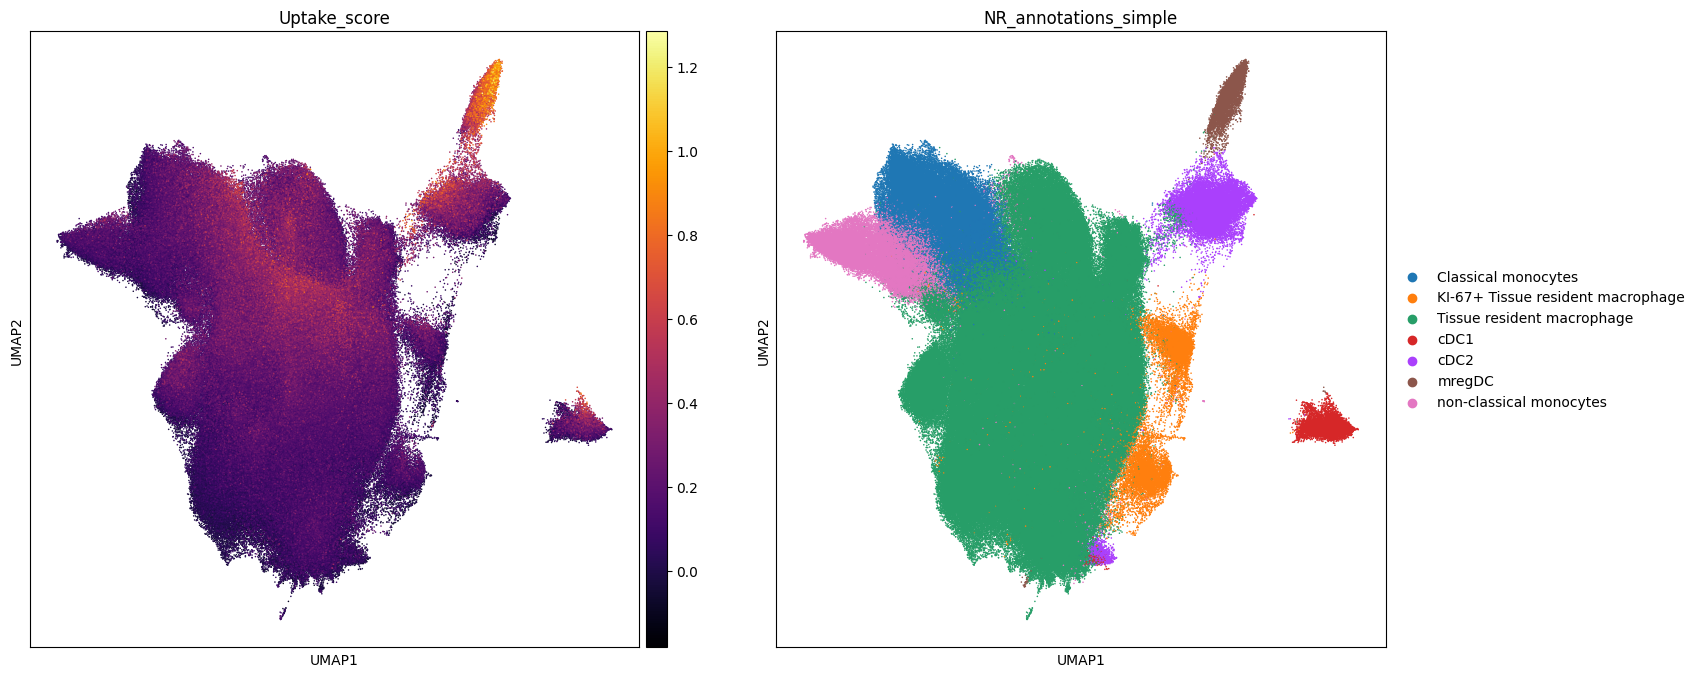

In [11]:
#plotting 
with plt.rc_context({"figure.figsize": (8, 8)}):
    sc.pl.umap(data, color=colour_vars, ncols=2, size=5, color_map="inferno")

### Invitro sigs from Liam: 

In [12]:
# make objects with sigs
#Note: each signature is top 100 (or less) upregulated DEGS in group compared to untreated. 4 or 18 refered to timepoint (hrs)
IFNbCD40_4 = ['IFI44L','DDX60','IFI44','IFIT1','CXCL10','HERC5','CXCL9','RSAD2','PDGFRL','IFIT3','OTOF','CXCL11','APOBEC3A','DDX60L','IFIT2','SERPING1','USP18','IFI27','ELOVL3','HERC6','XAF1','OAS3','ETV7','AL445490.1','TNFSF10','OAS2','ISG20','CCL8','KCTD14','SIDT1','ISG15','MX2','IFI6','AP001610.1','HELZ2','DDX58','MYH7','RUFY4','FXYD6','ALMS1P1','HESX1','OASL','MX1','CACNA1I','CMPK2','IFITM1','OAS1','CXCR2P1','BATF2','CCL2','IL12B','TBX1','BX255923.2','NUPR1','PRAL','APOL6','AL645608.7','IFNL3P1','PARP14','SLC25A3P1','NRIR','AP000757.1','AC112719.2','GCNT4','AMOTL2','SAA2','CFB','NAT8','LY6E','GBP4','SLC8A2','TFEC','RTP4','C5orf56','LGALS3BP','CD38','EPHB2','PAX5','AL133523.1','EPSTI1','STAT1','CASP10','STAP1','UBE2L6','GJA4','IFITM3','MNDA','NEXN','CCL13','LAMP3','SLC38A5','SMTNL1','EIF2AK2','TNFSF18','SLC1A3','TRIM14','ANO7L1','MBOAT4','SLFN5']
IFNb_4 = ['IFI44L','DDX60','IFI44','IFIT1','HERC5','OTOF','RSAD2','CXCL10','IFIT3','CXCL9','PDGFRL','DDX60L','SERPING1','APOBEC3A','IFI27','IFIT2','USP18','ELOVL3','CXCL11','XAF1','HERC6','AL445490.1','ETV7','OAS3','TNFSF10','ISG20','OAS2','ISG15','KCTD14','CCL8','SIDT1','MX2','IFI6','AP001610.1','MYH7','RUFY4','DDX58','BATF2','HELZ2','HESX1','OASL','CACNA1I','MX1','FXYD6','IFITM1','IFNL3P1','ALMS1P1','OAS1','CMPK2','TBX1','CXCR2P1','AP000757.1','NUPR1','CCL2','AL645608.7','APOL6','SLC8A2','RTP4','PARP14','LY6E','SLC25A3P1','LGALS3BP','C5orf56','NRIR','CFB','PAX5','GCNT4','CD38','MBOAT4','EPHB2','EPSTI1','PRAL','TRIM31','STAP1','UBE2L6','NAT8','CASP10','ANO7L1','TFEC','STAT1','IFITM3','MNDA','SLC38A5','TNFSF18','TRIM14','SMTNL1','AC136475.9','PZP','EIF2AK2','GBP4','SAA2','AL133523.1','AMOTL2','IRF6','DHX58','CCL13','KANK3','AC136475.5','IFI35']
IFNbCD40_18 = ['CBWD6','CCL19','IFI44L','IL12B','IFI27','CXCL11','CD70','EBI3','IFIT2','CCL5','NXPH3','ENTHD1','KCNK5','IFI44','CXCL9','IL27','IL2RA','COL5A3','GATA6','FXYD6','GNG4','LINC00158','CYP7B1','CXCL10','EXOC3L4','SERPING1','SLC1A3','ITGB8','PRAME','SLC6A12','TMCC2','CCL22','NUAK2','IFIT3','SYNPO','CD200','SYNM','TPPP','ACHE','MIR155HG','MATN2','SEMA4C','CFB','SYNPO2','UPB1','CD82','LAYN','ISG20','TNFAIP6','BHLHE22','ATOH8','SOCS2','LINC02154','C1orf61','EDARADD','MYO1B','HERC5','TCF7','IGSF3','SNN','JAG1','SLC6A13','HOPX','ANKRD33B','MGLL','OXTR','CCR7','TNFAIP3','TNFRSF9','KCNN1','SOCS2-AS1','AC003092.1','TNFAIP2','FAM186B','DDX60','FSCN1','NBL1','CCL13','CGN','ADORA2A','CAMK1G','IRF1','TREML1','GBP4','ADORA2A-AS1','BCL2A1','LRRC32','USP18','AC119427.1','XAF1','UNC13A','SIRPA','RSAD2','SEMA7A','GPR132','CITED4','ETV7','TNFSF9','SLC1A2']
IFNb_18 = ['IFI44L','IFI44','IFIT3','IFIT2','IFI27','RSAD2','SERPING1','CXCL11','CCL13','FXYD6','IFIT1','DDX60','CXCL10','XAF1','HERC5','RUFY4','USP18','CXCL9','DDX60L','CCL19','ISG20','CCL2','OAS2','HERC6','OASL','IFI6','OAS1','LGALS3BP','OAS3','RNF43','IFITM1','TNFSF10','HESX1','ISG15','GATA6','MYH7','ZNF385C','LINGO1','IFITM3','CFB','MX2','CMPK2','IL2RA','MX1','HELZ2','ETV7','ENTHD1','EXOC3L4','LY6E','CASP10','LILRA5','DDX58','KANK3','TFEC','MST1R','SYNPO2','GNG4','GBP4','SYNPO','STAT1','LINC00158','PRAME','CCR7','SLFN5','ANKRD33B','VTN','KCNN1','SEMA6B','NRXN2','FOXD4L1','C17orf99','LINC02154','DHX58','SIGLEC1','C1orf61','NID1','PLEKHG6','CLEC2D','IL4I1','AC119427.1','PHLDA1','DSP','AC003092.1','PELI2','SEMA4C','CCL5','NCF1B','NEURL3','RASGRP3','LIF','IL23R','LIPG','NUAK2','VANGL2','APOBEC3H','TMCC3','BATF2','TMEM51','STAP1']
IFNgCD40_18 = ['IL12B','BX255923.2','CXCL9','CCL5','CXCL11','LAYN','IL2RA','EBI3','IL27','CD70','EXOC3L4','LINC00158','ITGB8','CCL19','SYNPO2','GBP1','CXCL10','ENTHD1','GNG4','SLC6A12','GBP4','SLC1A3','NXPH3','C1orf61','SYNM','SERPING1','G0S2','PRAME','GBP5','COL5A3','CYP7B1','TMCC2','SEMA4C','KCNK5','GATA6','LINC02154','SYNPO','UPB1','ACHE','CD200','CFAP46','SLC6A13','ENTPD2','MIR155HG','NUAK2','CCL22','AC003092.1','FAM186B','UNC13A','TPPP','SOCS2-AS1','TNFAIP2','SOCS2','TNFAIP6','HOPX','TBX21','CAMK1G','ETV7','TNFAIP3','BHLHE22','IRF1','MGLL','FXYD6','CD82','SNN','EDARADD','JAG1','ISG20','SLC12A8','SLC1A2','ADORA2A-AS1','NBL1','ADORA2A','IGSF3','KCNN1','SAA1','MATN2','IL32','AC119427.1','OXTR','CGN','ASTL','ANKRD33B','ATOH8','BCL2A1','CFB','CCND2','CCR7','HAPLN3','GPR132','SEMA7A','PRR5L','TREML1','FSCN1','RAPGEF3','TCF7','IL4I1','LINC02541','TNFRSF9']
IFNg_18 = ['SERPING1','TBX21','CXCL9','CXCL11','GBP5','ETV7','RARRES3','IRF1','GBP2','IFIT2','RUFY4','GBP1','GBP4','LGALS3BP','SAMD4A','CCL19','HAPLN3','APOL6','HIVEP3','ISG20','SOCS1','CD7','ASCL2','GTF2IRD1','TGM2','LIF','CFB','AC003092.1','SLC6A12','STAT1','MYO7B','C5orf56','SECTM1','CD274','FOXC1','ABCC11','ALDH1A1','F3','CALHM6','LIPH','KIF5C','LDLRAD3','APBA2','WARS','VAMP5','LAP3','IDO1','ADGRB1','C1QB','IL15RA','UBE2L6','JAG1','TNFAIP2','NCF1C','MGLL','NCF1','BCL2A1','OPTN','BCL2L11','C1orf21','IL18BP','CD40','PARP14','EBF4','SOD2','ATF5','RUNX2','SFMBT2','EXT1','SLAMF7','IRF9','NLRC5','NFKBIZ','RNF213','BCL3','EPSTI1','SCARF1','ACSL1','ODF3B','NABP1','TXN','LINC-PINT','TYMP','TRAF3','STAT3']

In [13]:
#Score cells (note genes not included - highlighted red on excel)
sc.tl.score_genes(data, IFNbCD40_4, score_name='IFNbCD40_4_score')

       'PRAL', 'AL645608.7', 'IFNL3P1', 'SLC25A3P1', 'NRIR', 'AP000757.1',
       'AC112719.2', 'NAT8', 'C5orf56', 'AL133523.1', 'SMTNL1', 'ANO7L1'],
      dtype='object')


In [14]:
sc.tl.score_genes(data, IFNb_4, score_name='IFNb_4_score')

       'AP000757.1', 'AL645608.7', 'SLC25A3P1', 'C5orf56', 'NRIR', 'PRAL',
       'NAT8', 'ANO7L1', 'SMTNL1', 'AC136475.9', 'AL133523.1', 'AC136475.5'],
      dtype='object')


In [15]:
sc.tl.score_genes(data, IFNbCD40_18, score_name='IFNbCD40_18_score')

       'AC119427.1'],
      dtype='object')


In [16]:
sc.tl.score_genes(data, IFNb_18, score_name='IFNb_18_score')

In [17]:
sc.tl.score_genes(data, IFNgCD40_18, score_name='IFNgCD40_18_score')

       'ADORA2A-AS1', 'AC119427.1', 'LINC02541'],
      dtype='object')


In [18]:
sc.tl.score_genes(data, IFNg_18, score_name='IFNg_18_score')

       'LINC-PINT'],
      dtype='object')


In [19]:
#Score cells (DC only)
sc.tl.score_genes(data_DC, IFNbCD40_4, score_name='IFNbCD40_4_score')
sc.tl.score_genes(data_DC, IFNb_4, score_name='IFNb_4_score')
sc.tl.score_genes(data_DC, IFNbCD40_18, score_name='IFNbCD40_18_score')
sc.tl.score_genes(data_DC, IFNb_18, score_name='IFNb_18_score')
sc.tl.score_genes(data_DC, IFNgCD40_18, score_name='IFNgCD40_18_score')
sc.tl.score_genes(data_DC, IFNg_18, score_name='IFNg_18_score')

       'PRAL', 'AL645608.7', 'IFNL3P1', 'SLC25A3P1', 'NRIR', 'AP000757.1',
       'AC112719.2', 'NAT8', 'C5orf56', 'AL133523.1', 'SMTNL1', 'ANO7L1'],
      dtype='object')
       'AP000757.1', 'AL645608.7', 'SLC25A3P1', 'C5orf56', 'NRIR', 'PRAL',
       'NAT8', 'ANO7L1', 'SMTNL1', 'AC136475.9', 'AL133523.1', 'AC136475.5'],
      dtype='object')
       'AC119427.1'],
      dtype='object')
       'ADORA2A-AS1', 'AC119427.1', 'LINC02541'],
      dtype='object')
       'LINC-PINT'],
      dtype='object')


In [20]:
colour_vars = ["IFNbCD40_4_score","IFNb_4_score","IFNbCD40_18_score","IFNb_18_score","IFNgCD40_18_score","IFNg_18_score","Uptake_score","NR_annotations_simple"]

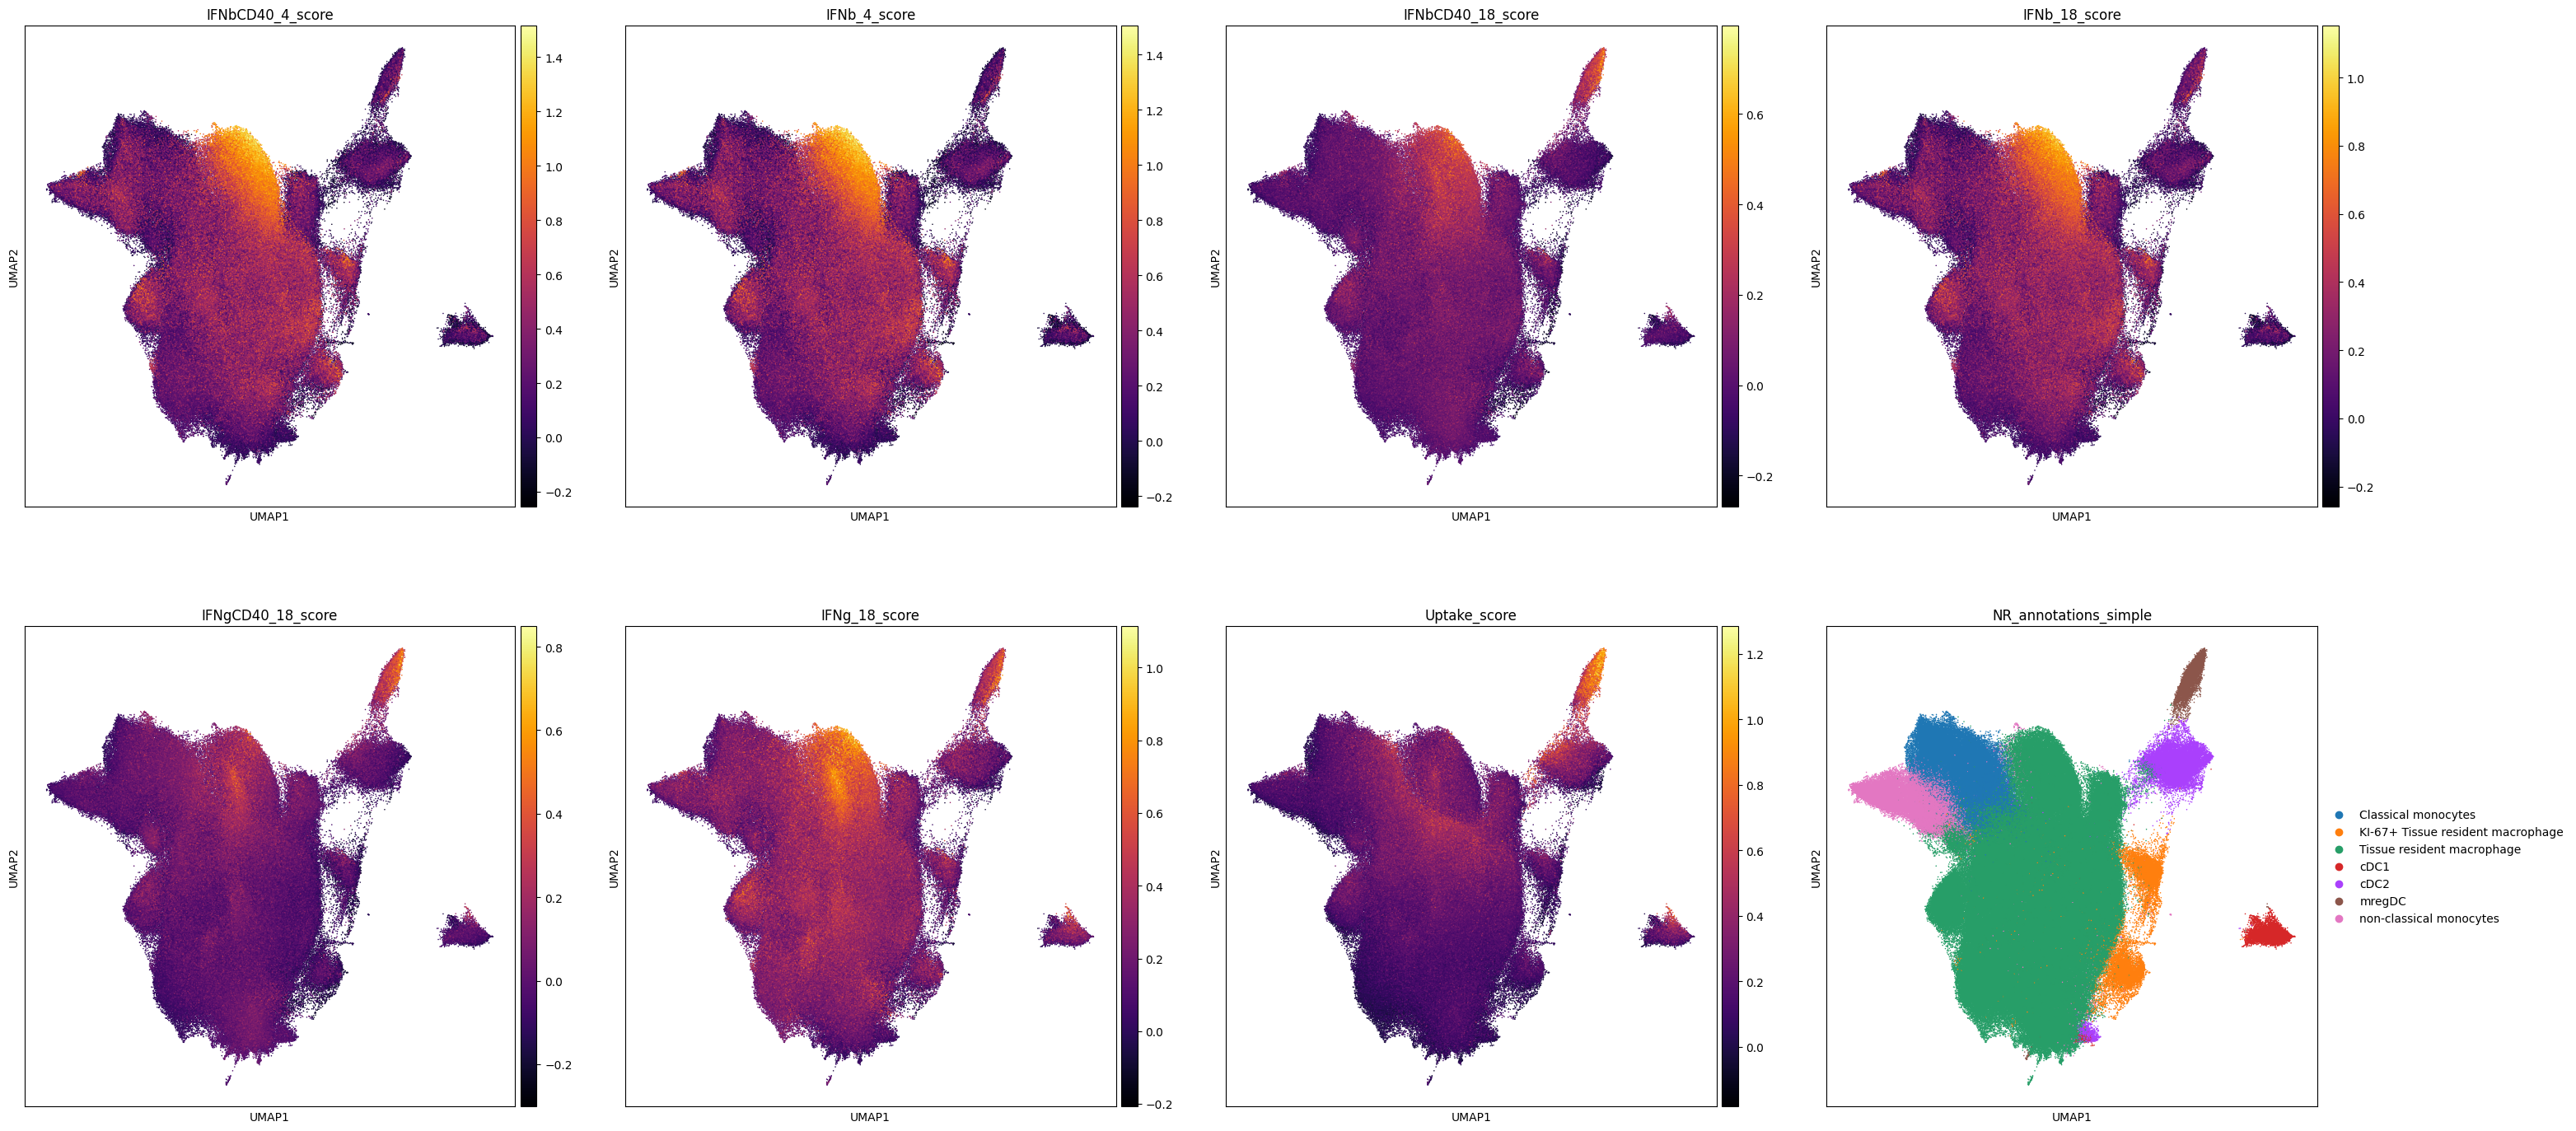

In [21]:
#plotting 
with plt.rc_context({"figure.figsize": (8, 8)}):
    sc.pl.umap(data, color=colour_vars, ncols=4, size=5, color_map="inferno")

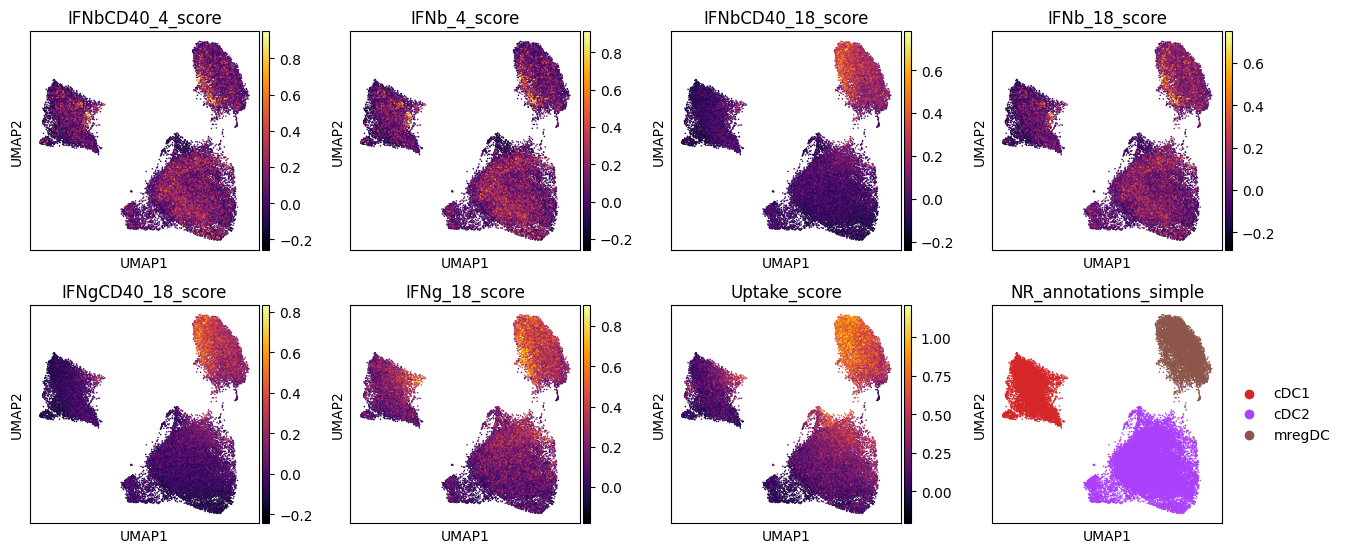

In [22]:
#plotting 
with plt.rc_context({"figure.figsize": (3, 3)}):
    sc.pl.umap(data_DC, color=colour_vars, ncols=4, size=5, color_map="inferno")

# KR Question 2:

### IFNb sig highest in top right mac cluster, investigating what this cluster is:

In [23]:
data

AnnData object with n_obs × n_vars = 498023 × 1268
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'keep_or_remove', 'leiden', 'celltype', 'leiden_DC', 'leiden_DC_v2', 'exclude_annots', 'leiden_M', 'Technology', 'cancer_type_broad', 'clean-leiden_0.8', 'clean-subcluster', 'clean-subcluster-v2', 'YS_sig', 'HSC_sig', 'CD5nDC2_up_vDC3', 'DC3_up_vCD5nDC2', 'CD5pDC2_up_vDC3', 'DC3_up_vCD5pDC2', 'DC3_up_vMono', 'Mono_up_vDC3', 'DC1_sig', 'DC2_sig', 'DC3_sig', 'DC_Axl_sig', 'DC2_up_DC3', 'DC3_up_DC2', 'mregDC_sig', 'cDC1_mregDC', 'cDC2_mregDC', 'NR_annotati

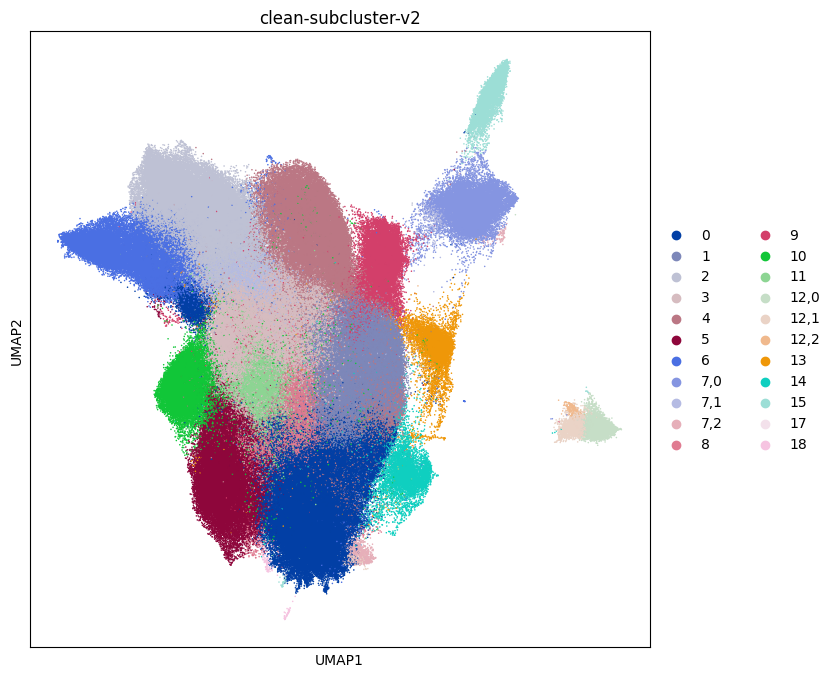

In [24]:
with plt.rc_context({"figure.figsize": (8, 8)}):
    sc.pl.umap(data, color=["clean-subcluster-v2"], ncols=3, size=5, color_map="inferno")

### Therefore, the cluster of interest is cluster 4 in clean-subcluster-v2

In [25]:
#calculate DEG genes (12min):
sc.tl.rank_genes_groups(data, groupby="clean-subcluster-v2", method="wilcoxon")

/home/s4436039/miniforge3/envs/env/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:435: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/home/s4436039/miniforge3/envs/env/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:437: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/home/s4436039/miniforge3/envs/env/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:440: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

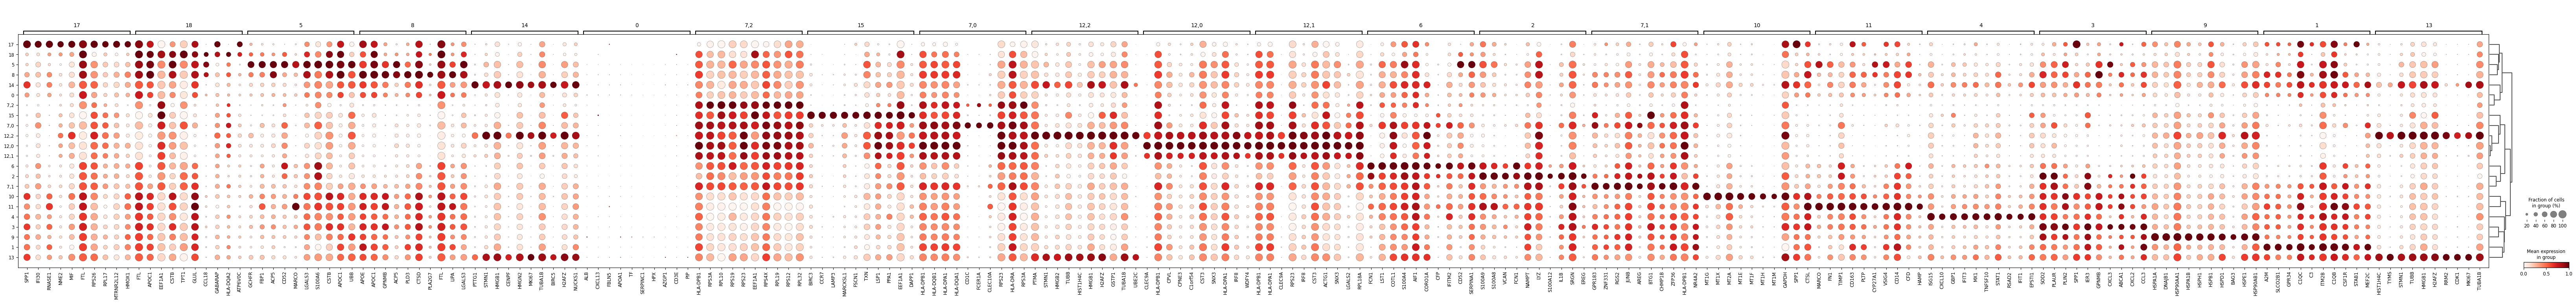

In [26]:
#visualise the top 10 DEG genes for each cluster
sc.pl.rank_genes_groups_dotplot(
    data, groupby="clean-subcluster-v2", standard_scale="var", n_genes=10, min_logfoldchange=1
)

### Therefore, cluster 4 top 10 degs are: 
* ISG15
* CXCL10
* GBP1
* IFIT3
* MX1
* TNFSF10
* STAT1
* RSAD2
* IFIT1
* EPSTI1

## ^ all ISGs ***

In [27]:
myeloid_genes = {
    "DC": ["HLA-DRA"],
    "cDC1": ["CLEC9A", "XCR1","BATF3","IRF8","FLT1"],
    "cDC2": ["CD1C", "FCER1A", "CLEC10A","CD5","IRF4"],
    "DC3": ["CD1C","FCER1A","CD14","CD163","CSF2RA","CSF2RB"],
    "mregDC": ["LAMP3","CD274","CCR7"],
    "Monocytes": ["CD14", "FCGR3A","CD163","LYZ","S100A8","S100A9","CCR2"],
    "Macrophages": ["FCGR1A", "CD68","CSF1R","TREM2","SPP1","CX3CR1","AIF1"],
    "Tissue Res Macs": ["C1QA","C1QB","C1QC","BTK","C3AR1","CCR1","MERTK"],
    "Proliferating": ["MKI67"],
    "ISG c4 DEGS": ["ISG15", "CXCL10", "GBP1", "IFIT3", "MX1", "TNFSF10", "STAT1", "RSAD2", "IFIT1", "EPSTI1"]
}

## Change their NR annotation so I can plot vs my DCs:

In [29]:
# subset out cells in cluster 4:
mac_4 = data[data.obs["clean-subcluster-v2"].isin(["4"])]

In [30]:
mac_4

View of AnnData object with n_obs × n_vars = 44122 × 1268
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'keep_or_remove', 'leiden', 'celltype', 'leiden_DC', 'leiden_DC_v2', 'exclude_annots', 'leiden_M', 'Technology', 'cancer_type_broad', 'clean-leiden_0.8', 'clean-subcluster', 'clean-subcluster-v2', 'YS_sig', 'HSC_sig', 'CD5nDC2_up_vDC3', 'DC3_up_vCD5nDC2', 'CD5pDC2_up_vDC3', 'DC3_up_vCD5pDC2', 'DC3_up_vMono', 'Mono_up_vDC3', 'DC1_sig', 'DC2_sig', 'DC3_sig', 'DC_Axl_sig', 'DC2_up_DC3', 'DC3_up_DC2', 'mregDC_sig', 'cDC1_mregDC', 'cDC2_mregDC', 'NR_a

In [31]:
#set annotation
mac_4.obs["NR_annotations_simple"] = "ISG+ mac"

/scratch/temp/13633872/ipykernel_2772465/3573818437.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


In [32]:
#update  
data.obs["NR_annotations_simple"] = data.obs["NR_annotations_simple"].astype(str)
data.obs["NR_annotations_simple"].update(mac_4.obs["NR_annotations_simple"]) 

/scratch/temp/13633872/ipykernel_2772465/2501165649.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.




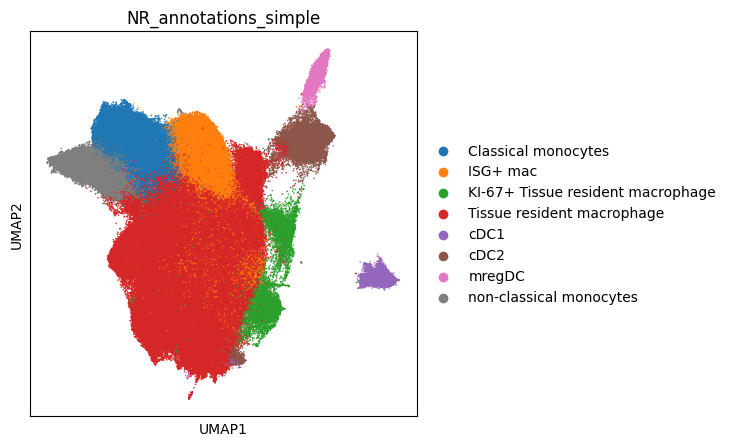

In [36]:
with plt.rc_context({"figure.figsize": (5, 5)}):
    sc.pl.umap(data, color=["NR_annotations_simple"], ncols=3, size=5, color_map="inferno")

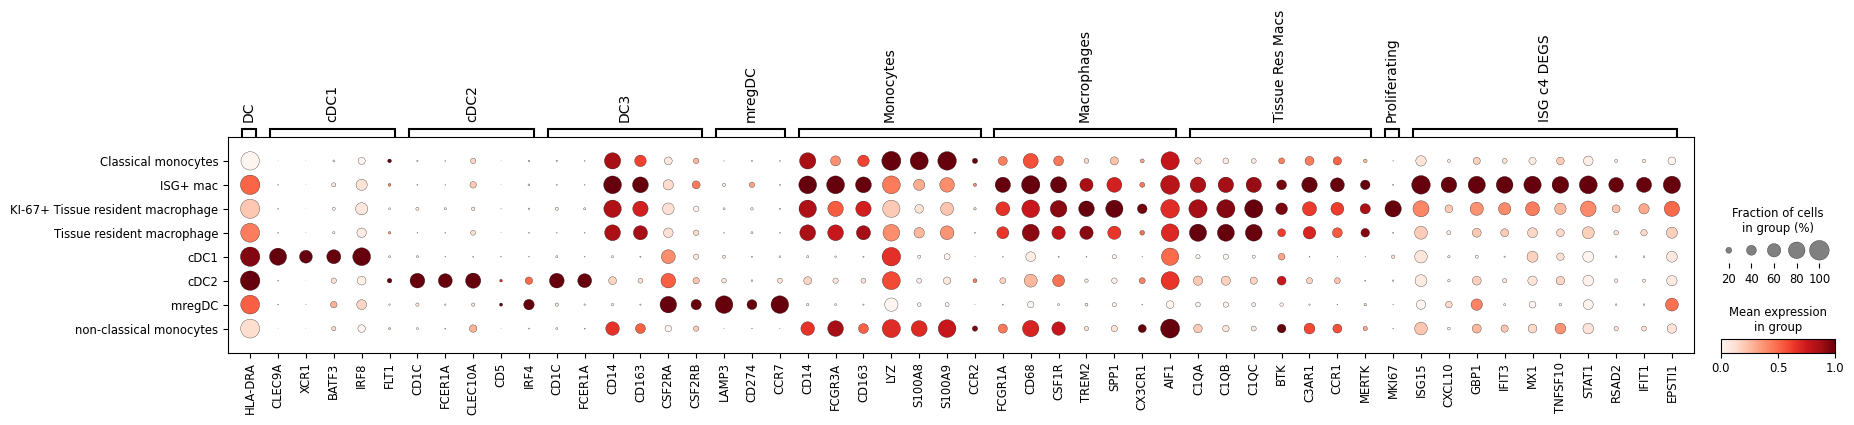

In [34]:
sc.pl.dotplot(data, myeloid_genes, groupby="NR_annotations_simple", standard_scale="var")

In [37]:
#define function
def cluster_small_multiples(
    data_int, clust_key, size=10, frameon=False, legend_loc=None, **kwargs
):
    tmp = data_int.copy()

    for i, clust in enumerate(data_int.obs[clust_key].cat.categories):
        tmp.obs[clust] = data_int.obs[clust_key].isin([clust]).astype("category")
        tmp.uns[clust + "_colors"] = ["#d3d3d3", data_int.uns[clust_key + "_colors"][i]]

    sc.pl.umap(
        tmp,
        groups=tmp.obs[clust].cat.categories[1:].values,
        color=data_int.obs[clust_key].cat.categories.tolist(),
        size=size,
        frameon=frameon,
        legend_loc=legend_loc,
        **kwargs
    )

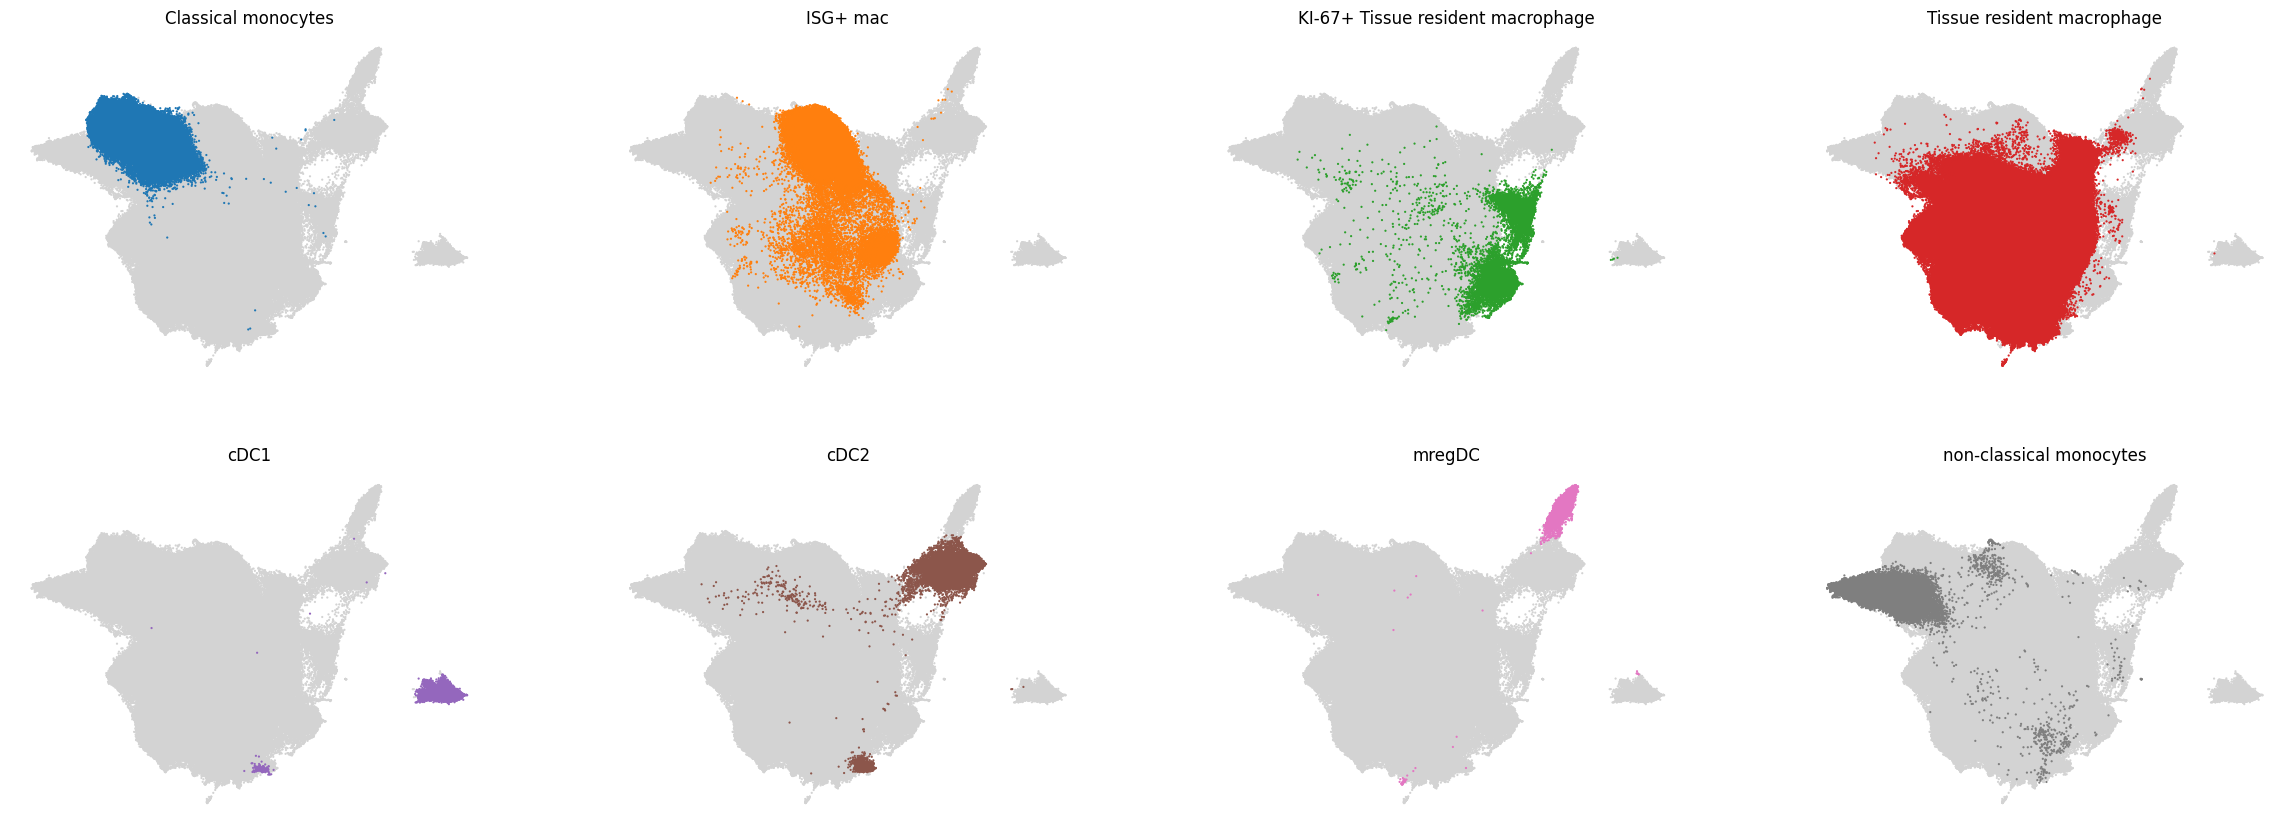

In [38]:
cluster_small_multiples(data, "NR_annotations_simple")

# KR Question 3:
## Are the macs associated with the IFNb signature more enriched in any particular cancer type?

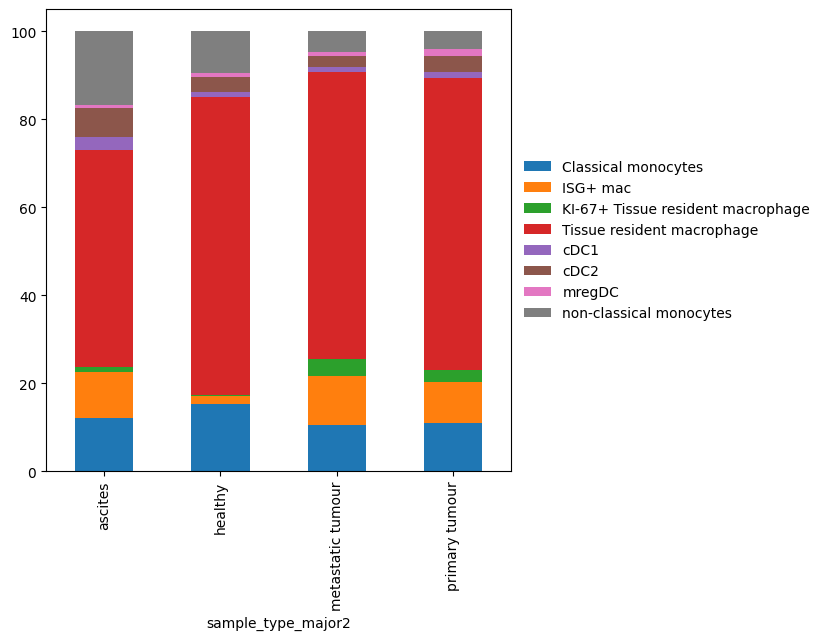

In [39]:
#### Creating a stacked bar
pd.crosstab(data.obs["sample_type_major2"], data.obs["NR_annotations_simple"]).apply(
    lambda r: r / r.sum() * 100, axis=1
).plot.bar(stacked=True, figsize=(6,6))
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left", frameon=False)
plt.show()

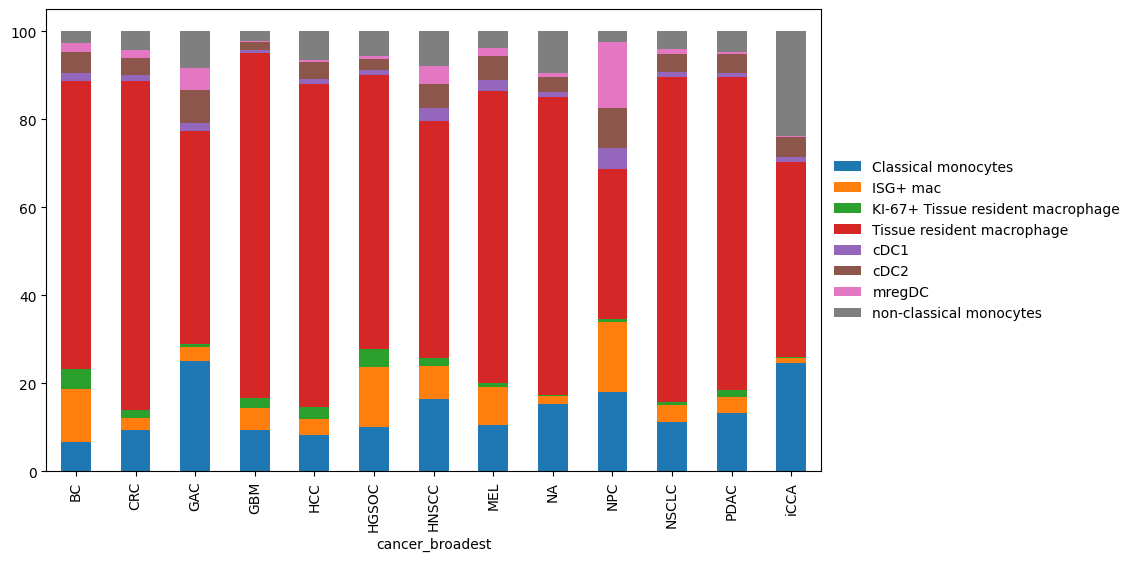

In [41]:
#### Creating a stacked bar
pd.crosstab(data.obs["cancer_broadest"], data.obs["NR_annotations_simple"]).apply(
    lambda r: r / r.sum() * 100, axis=1
).plot.bar(stacked=True, figsize=(10,6))
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left", frameon=False)
plt.show()

In [48]:
# check
type_counts = data.obs['sample_type_major2'].value_counts()
print(type_counts)

sample_type_major2
primary tumour       273023
metastatic tumour    127339
healthy               63409
ascites               34252
Name: count, dtype: int64


In [49]:
#repeat with just primary tumours: 
data_P = data[data.obs["sample_type_major2"] == "primary tumour"]

In [50]:
data_P

View of AnnData object with n_obs × n_vars = 273023 × 1268
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'keep_or_remove', 'leiden', 'celltype', 'leiden_DC', 'leiden_DC_v2', 'exclude_annots', 'leiden_M', 'Technology', 'cancer_type_broad', 'clean-leiden_0.8', 'clean-subcluster', 'clean-subcluster-v2', 'YS_sig', 'HSC_sig', 'CD5nDC2_up_vDC3', 'DC3_up_vCD5nDC2', 'CD5pDC2_up_vDC3', 'DC3_up_vCD5pDC2', 'DC3_up_vMono', 'Mono_up_vDC3', 'DC1_sig', 'DC2_sig', 'DC3_sig', 'DC_Axl_sig', 'DC2_up_DC3', 'DC3_up_DC2', 'mregDC_sig', 'cDC1_mregDC', 'cDC2_mregDC', 'NR_

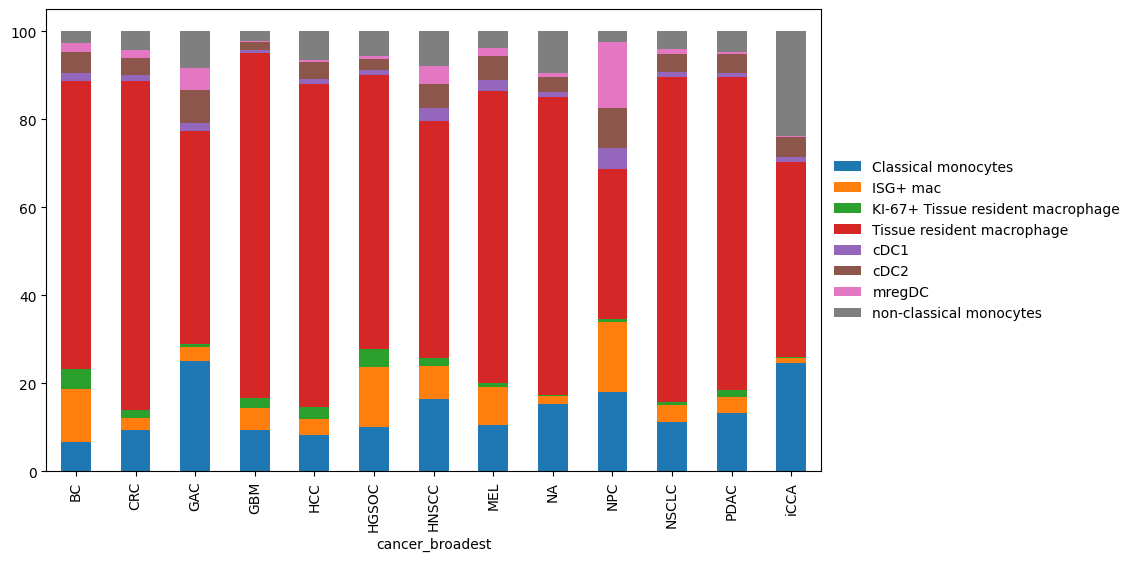

In [51]:
#### Creating a stacked bar
pd.crosstab(data.obs["cancer_broadest"], data.obs["NR_annotations_simple"]).apply(
    lambda r: r / r.sum() * 100, axis=1
).plot.bar(stacked=True, figsize=(10,6))
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left", frameon=False)
plt.show()

# KR Question 4:

#### How similar / different is our IFNb and IFNg signatures to the ‘ISG+ DC signature(s) – see Table 1 in https://www.nature.com/articles/s41568-024-00787-3. Can you overlay an ISG signature on your atlas if you haven’t already? The IFN induced gene signatures unique and common to DC2 and DC3 from   DOI: 10.1126/sciimmunol.abe0347 might also be interesting to overlay on the atlas.

* The ISG sig from that Nature paper is: ISG15, ISG20, CXCL9, CXCL10, IFIT1, IFIT3, IFI6 and GBP2
* These genes are in all of Liam's signatures 
* Summary (see sheet 'Comparison to other signatures' in Summary-gene-sets excel file): 
* IFNbCD40_4 has IFIT1, CXCL10, CXCL9, IFIT3, ISG20, ISG15, IFI6
* IFNb_4 has IFIT1, CXCL10, IFIT3, CXCL9, ISG20, ISG15, IFI6
* IFNbCD40_18 has CXCL9, CXCL10, IFIT3, ISG20
* IFNb_18 has IFIT3, IFIT1, CXCL10, CXCL9, ISG20, IFI6, ISG15
* IFNgCD14_18 has CXCL9, CXCL10, ISG20
* IFNg_18 has CXCL9, GBP2, ISG20

## Overlay ISG sig (Moon et al) on atlas:

In [52]:
#define sig
ISG_sig = ["ISG15", "ISG20", "CXCL9", "CXCL10", "IFIT1", "IFIT3", "IFI6", "GBP2"]    

In [53]:
#score genes
sc.tl.score_genes(data, ISG_sig, score_name='ISG_score')
sc.tl.score_genes(data_DC, ISG_sig, score_name='ISG_score')

In [54]:
colour_vars = ["ISG_score","NR_annotations_simple"]

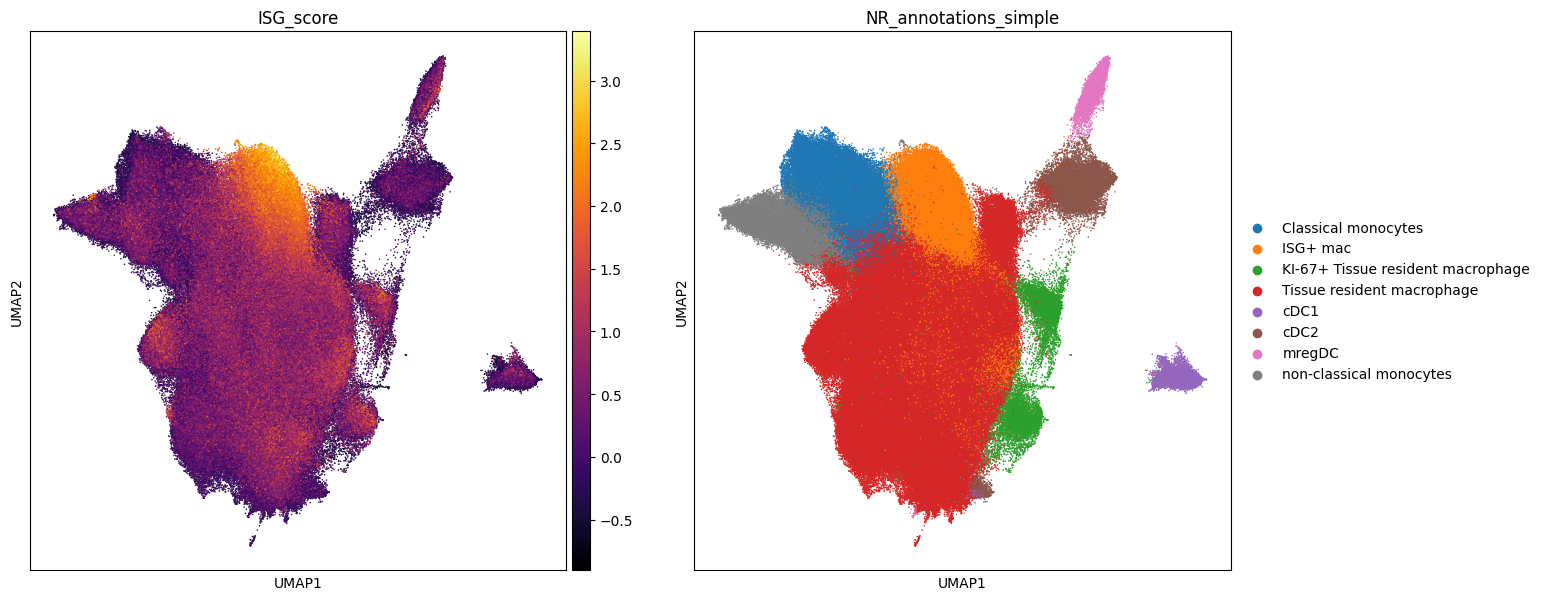

In [59]:
#plotting 
with plt.rc_context({"figure.figsize": (7, 7)}):
    sc.pl.umap(data, color=colour_vars, ncols=2, size=5, color_map="inferno")

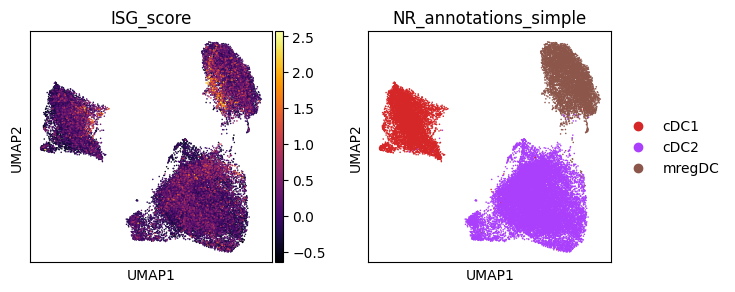

In [58]:
#plotting 
with plt.rc_context({"figure.figsize": (3, 3)}):
    sc.pl.umap(data_DC, color=colour_vars, ncols=2, size=5, color_map="inferno")

## Overlay ISG DC2vDC3 sigs on atlas (Girad et al):

In [ ]:
#define sigs (all genes upregulated in response to IFN-I)
Uni_14_sig = ['SDS','PHACTR4','HERPUD2','NHLRC3','ADCY7','AFF1','ATXN7L1','PRR13','SP140L','CTNNBL1','CYTH1','TMBIM1','BATF2','PTPRE','UBE2S','MAX','C4orf3','FMR1','PLEK','FAM8A1','TSC22D1','LHFPL2','PTGER2','ARHGAP17','BLOC1S2','CPEB2','FNIP2','SDCBP','CEP63','CLIC4','CLTA','FYB1','ADAMDEC1','ATP13A2','LILRB3','MDM2','SLFN12','CLEC4E','SIRPA','ANKFY1','SCIN','NFE2L3','HK2','MICB','RICTOR','PAQR8','SLC30A1','LACC1','TRIM38','ABCD1','FAM241A','ERBIN','WASHC2A','DAPP1','IER5','HIST1H2AC','NTAN1','PLA2G7','ARL6IP6','IKBKE','RELA','CCL7','CHST12','MIR3945HG','SRC','RHBDF2','WTAP','EIF4E3','AKT1S1','TPMT','MS4A6A','NFE2L2','MAFB','PARP11','TLR4','RAB12','FYTTD1','MAP3K7CL','TLNRD1','PANK2','BACH1','TMEM123','DDHD1','RAPGEF2','LPAR6','CREBRF','JUND','NT5C2','EGR2','HLA-DPA1','LAMP2','GPD2','LMO2','BRSK1','BNIP3L','RAB20','SGTB','KYNU','ADM','TRIM26','SPHK1','HBP1','GPR141','RAP2C','MXD1','RAB1A','SELENOO','SPATA13','GALM','HPSE','PFKFB3','RNF19A','CMKLR1','RRBP1','HACD4','ZNRF2','CDC42EP1','DOCK4','B4GALT5','WASHC2C','UBE2B','PLEKHF2','RNF138','LACTB','GOLGA4','TDP2','ZNF267','SLC17A5','TESK1','ARHGAP27','CARD16','KAT2B','IRF2BPL','RCBTB2','RBMS1','SSFA2','PATL1','PRDM1','UBE2D1','KIAA1109','IQGAP2','ZNF638']  
Uni_DC2_sig = ['C3orf14','RGS2','U2SURP','CCSER2','G3BP1','RAC1','TBC1D4','AC009948.1','TUBB2A','SDCCAG8','SPN','MSN','ARF6','SRP14','TBC1D13','TTF2','CCNL1','ENTHD1','NMRK1','EIF5','ALDH3A2','LY75','TSPAN13','AC114760.2','DUSP4','FSCN1','FLT3','SWAP70','LIMCH1','SERPINB6','MAP3K13','RAB29','TOMM34','C19orf12','SEC23IP','SNX11','DLGAP4','CCM2','MED10','NEXN','TM2D2','PMAIP1','TTYH2','PRRG4','CST3','GCA','MIR155HG','HIF1A','MCOLN2','FUBP1','CELF2','LITAF','GRSF1','OSBPL9','MSMO1','ARNTL2','TARS','RASSF4','RDX','CTSS','TOMM5','TIFAB','PGAM1','SMIM12','IL32','BZW1','FLOT1','SLC25A28','LCP1','CFB','CIRBP','STAT3','GTF2E2','FUOM','NMT1','NDUFA9','ATP6V0A2','EIF5A','MALAT1','EIF2S2','CTNNB1','RUFY3','ATP6V1A','IRF8','SZRD1','TDRD7','VOPP1','HLA-DOB','PDCD1LG2','HSPA1A','RAB10','PSMA6','UPF2','CD46','SAR1A','LINC00158','SOCS3','IRF9','RAB31','SELENOT','ARHGAP22','STK17B','AC116407.2','RGS1','BCL2L14','AC009133.1']
Uni_DC3_sig = ['TRIP6','ACTR3','RTN4','AC092069.1','C1QC','BAK1','PSMA3','GPR137B','GPR183','ETV3','BISPR','TRAF5','IGKC','ORMDL2','LAMP3','FABP5','EMP3','GADD45GIP1','RNASEH2B','PSMA7','TMBIM6','STK4','NRP2','PPP1CB','CYTIP','LAG3','CHST7','ABHD12','NECAP2','TNIP2','TMEM131','C1QB','C21orf91','ERP44','MRPL27','EXOSC9','RUNX2','MFSD12','FTL','C12orf45','CALM3','IL7R','RNH1','PCBP1','TRIL','TIMM10B','SELENOW','CALR','CLDND1','FAM49A','FNDC3B','EXOC3L1','GPX4','RUFY4','PPIA','AC005162.3','CRLF2','NPL','ACTG1','ATP1B3','MBD2','KPNA1','ADA','ABI3','HIST2H2BE']
Uni_16_sig = ['ANXA1','BRI3','SLC1A4','CLEC2B','COA6','SCIMP','ARF1','SIDT2','CDKN1C','MS4A7','HSPA1B','ARHGEF3','STIMATE','FCGR3A','CD69','TINF2','LINC01506','CD86','GCLC','RPL36AL','CH25H']
All_sig = ['PSMA2','ATOX1','PSMA4','TGM1','APOL2','HSPB1','NAPA','FGL2','HLA-F','TMSB10','EIF2AK2','IDO1','C15orf48','C19orf66','PNPT1','PML','IFITM3','IRF1','NT5C3A','LMNB1','FPR3','PARP12','TRIM22','NAMPT','BST2','OPTN','CMPK2','LYN','SPPL2A','SP100','SP110','CGAS','IFI6','PCGF5','TRIM21','ATF3','UBE2F','TAP2','BLVRA','CD38','SERPINB9','MYL12A','HLA-E','ST8SIA4','GMPR','LILRB4','SERPINB1','IFI44L','IFIT5','SRGAP2B','IFIT1','CCL8','TNFSF10','TNFSF13B','DTX3L','PPM1K','SERPING1','DYNLT1','GBP1','HESX1','GNG5','DUSP5','SSB','OAS2','SH3GLB1','ADAM19','PLSCR1','PHACTR2','SP140','MDK','SNX6','PARP10','VAMP5','ACSL1','LGALS9','SCARB2','RGL1','TAP1','H3F3B','ISG20','PILRA','MOB1A','BAG1','NUPR1','FAM72A','HSH2D','CXCL11','ATP6V1G1','UBE2L6','ADAR','RTP4','PARP14','MNDA','XRN1','IRF2','SLAMF7','IL1RN','RTCB','IFIT2','BAZ1A','KLF6','IFI27','IFITM2','C6orf62','IFI35','NMI','TMEM140','IFI16','NADK','TFEC','CXCL10','UBE2Z','SYNGR2','HERC5','STAT2','OAS3','CTSB','OAS1','RSAD2','ZFP36','MX1','SUB1','STOM','DDX60L','CNDP2','DRAP1','CLEC2D','HLA-B','ANKRD22','WARS','LY6E','LGALS3BP','TANK','IRF7','SAMD9L','DDX60','HLA-A','CFLAR','DDX58','HELZ2','ETV7','HERC6','SRGAP2','APOBEC3G','TMEM50A','RABGAP1L','XAF1','CD47','LAP3','UNC93B1','DNAJA1','IFIH1','SECTM1','B2M','APOBEC3A','CNP','NCF1','AIM2','DRAM1','CD164','GBP2','CALHM6','IL4I1','SNX2','SIGLEC1','ATF5','RBX1','USP18','SMCHD1','SAMD9','NAA25','NUB1','ST3GAL5','RNF114','SRGAP2C','TXN','GCH1','PLAC8','PPDPF','NINJ1','ACOT9','SPATS2L','EPSTI1','HLA-C','ZNFX1','HES4','GBP5','FBXO6','APOL1','PSME2','DHX58','SLC31A2','IFITM1','ANXA4','TRAFD1','PARP9','MT2A','CAST','APOL3','CD274','OASL','WDFY1','ATG3','MCL1','CCL2','GBP4','PHF11','STAT1','TYMP','IL27','TRIM5','IFI44','SAT1','BCL2A1','ISG15','FGD2','MX2','UBC','PSMB9','HSP90AA1','IFIT3','CBR1','RNF213','RAB8A','KIAA0040']
DC2_3_sig = ['PDGFRL','SLC38A5','CXCL13','BASP1','EED','SNHG15','PEA15','CCL19','EVA1B','FAS','SAP18','TUBB','YWHAQ','TUBB6','U62317.2','CXCL9','CMTR1','HSP90AB1','TRAF1','MRPL40','SLC41A2','TAPBP','NABP1','DDX10','MARCKSL1','TUBA1A','PSMB2','CSRP2','HAPLN3','AJ009632.2','TUBB4B','NFKB1','TNFSF18','NR4A3','RAP2B','KARS','B3GNT2']
DC2_14_16_sig = ['SAMD4A','KCNMA1','NBN','SQOR','LILRB2','MOV10','CBWD1','MARCKS','RBCK1','CCR1','FAM129A','DEFB1','CD80','SELL','CLECL1','RASGEF1B','DDIT3','RIN2','CREG1','RARRES3','RPL28','GLUL','CD40','PIK3AP1','CTSL','LYSMD2','SOCS1','LILRA6','APOBEC3C','CYSTM1','SNN','CBWD2','TNFAIP6','LCP2','GBP3','N4BP1','STX11','ARHGAP25','UBE2D3','PTP4A1','WIPF1','MSR1','ADPRHL2','SRGN','CIR1','CBWD5','CTSD','GSDMD','CASP4','NAGK','TCN2','PSMB10','CALM1','C3orf38','HAVCR2','ZBP1','TENT5A','LILRA5','RUBCN','CD68','TOR1B','CKAP4']
Mo_14_16_sig = ['VPS29','STK24','DECR1','ADA2','GIMAP8','TMEM60','MS4A4A','DPH3','PLEKHO1','CMC2','SPTLC2','GIMAP7','DOCK8','AKIRIN2','ABI1','SLC15A4','GIMAP4','MGAT1','C3AR1','GTF2B','SIGLEC14','CD53','CXorf21','PRLR','SNX10','CD48','GLRX','EMP1','ZC3HAV1','FFAR2','ZCCHC2','USP30-AS1','ASCL2','NCOA2','P2RX4','JAK2','CASP1','CCR5','SAT2','BLZF1','ELF1','IL15','DEK','CD72','P2RX7','GIMAP6','CCL3','RALB','GCNT1','CLIC1','CFD','CREM','CCRL2','CTSC']  

In [62]:
#score genes
sc.tl.score_genes(data, Uni_14_sig, score_name='Uni_14_score')
sc.tl.score_genes(data, Uni_DC2_sig, score_name='Uni_DC2_score')
sc.tl.score_genes(data, Uni_DC3_sig, score_name='Uni_DC3_score')
sc.tl.score_genes(data, Uni_16_sig, score_name='Uni_16_score')
sc.tl.score_genes(data, All_sig, score_name='All_score')
sc.tl.score_genes(data, DC2_3_sig, score_name='DC2_3_score')
sc.tl.score_genes(data, DC2_14_16_sig, score_name='DC2_14_16_score')
sc.tl.score_genes(data, Mo_14_16_sig, score_name='Mo_14_16_score')

       'HACD4', 'WASHC2C', 'SSFA2'],
      dtype='object')
       'AC009133.1'],
      dtype='object')


In [63]:
colour_vars = ["Uni_14_score","Uni_DC2_score","Uni_DC3_score","Uni_16_score","All_score","DC2_3_score","DC2_14_16_score","Mo_14_16_score","NR_annotations_simple"]

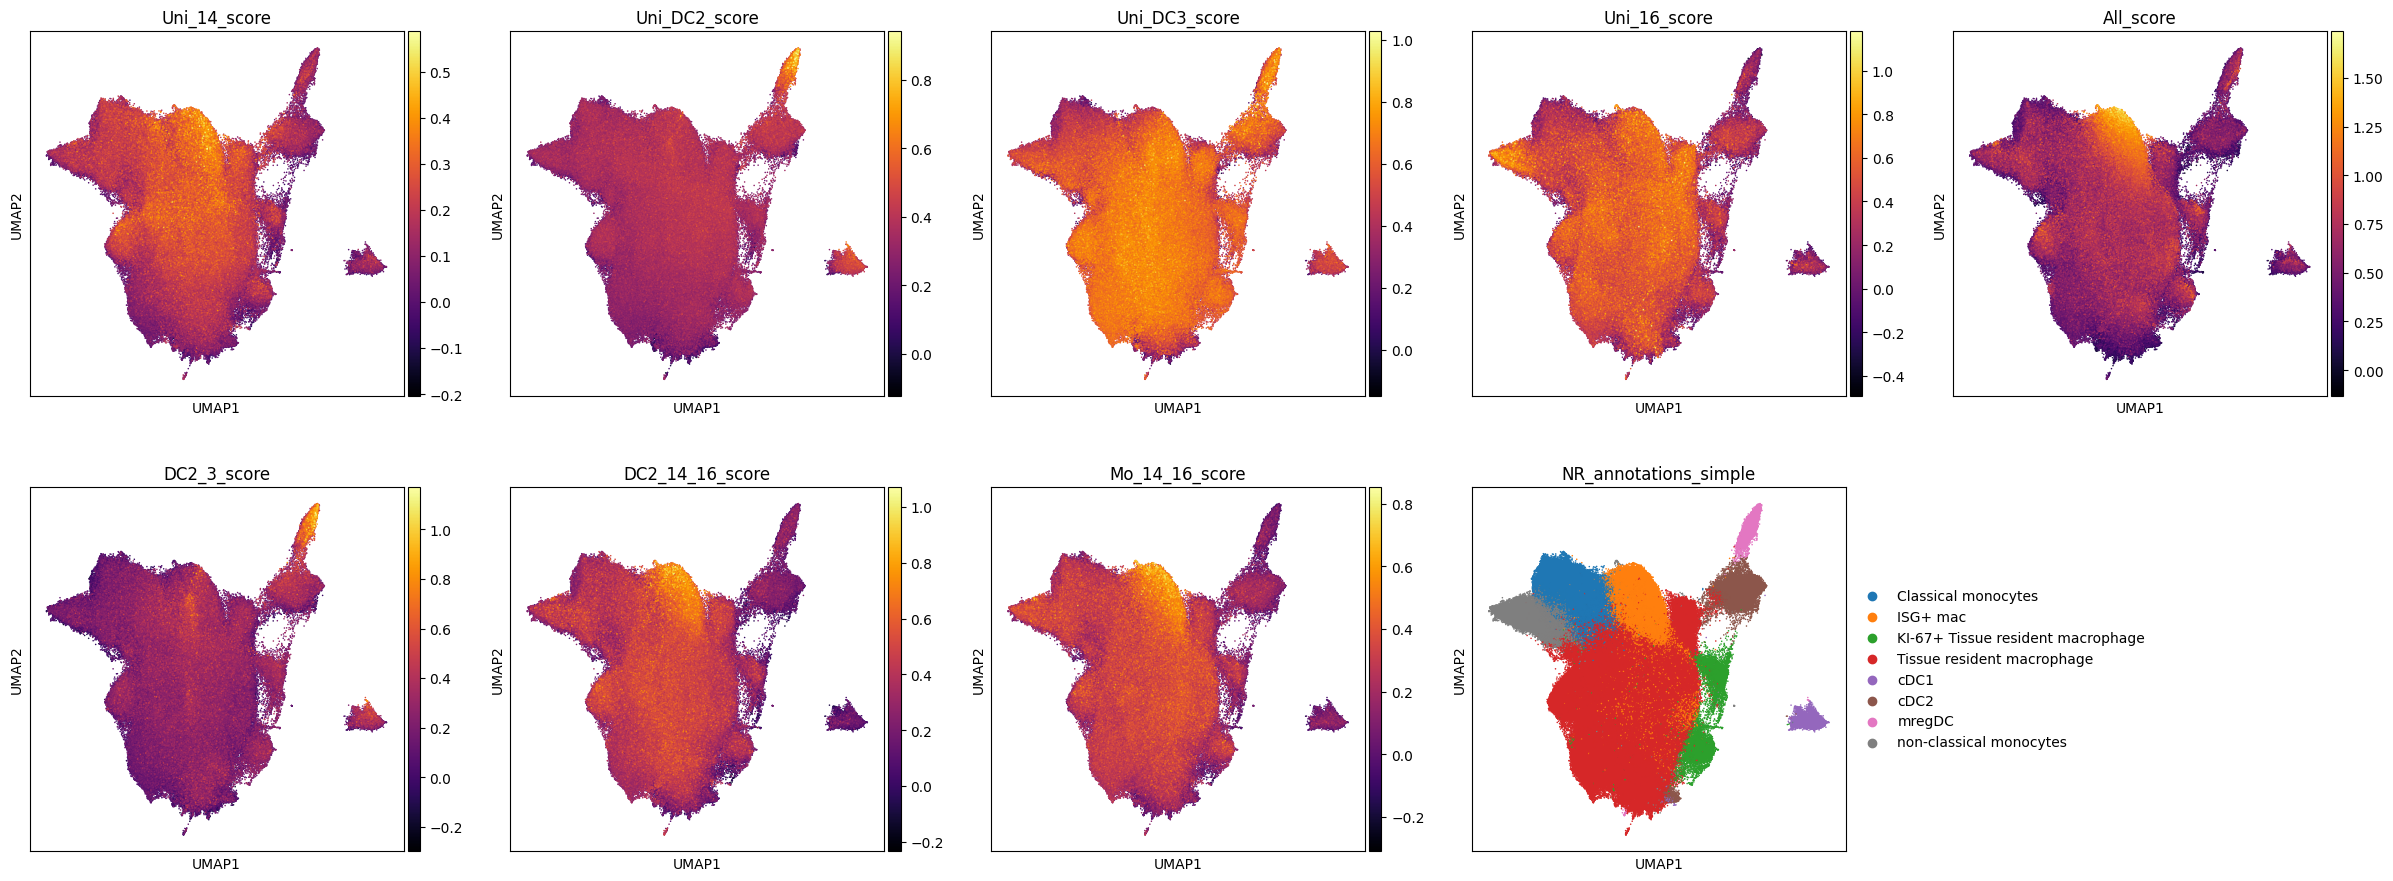

In [64]:
#plotting 
with plt.rc_context({"figure.figsize": (5, 5)}):
    sc.pl.umap(data, color=colour_vars, ncols=5, size=5, color_map="inferno")